In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model

# reflect the tables
inspector = inspect(engine)
inspect(engine).get_table_names()


['measurement', 'station']

In [10]:
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
# col = inspector.get_columns('Measurements')
# for c in col:
#     print(c['name'], c['type'])

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
#  Find the last date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [16]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_2016 = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()


In [18]:
columns = inspector.get_columns('mearsurement_year')
for column in columns:
    print(column["name"], column["type"])

In [19]:
measurements_df = pd.DataFrame(prcp_2016, columns= ["date","prcp"])

In [20]:
measurements_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [21]:
measurements_df['prcp']

0       0.08
1       2.15
2       2.28
3        NaN
4       1.22
        ... 
2218    0.50
2219    0.00
2220    0.00
2221    0.08
2222    0.45
Name: prcp, Length: 2223, dtype: float64

In [22]:
measurements_df=measurements_df.set_index('date')

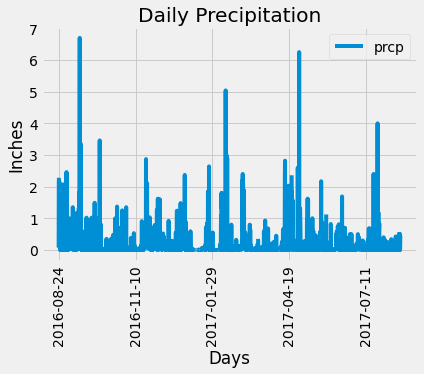

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
# multi_plot = measurements_df.plot(kind="bar")

# Set a title for the chart
measurements_df.plot(rot=90)
plt.title("Daily Precipitation")
plt.xlabel("Days")
plt.ylabel("Inches")
plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurements_df["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [25]:
# Design a query to show how many stations are available in this dataset?
# engine.execute('select station from measurement count station GROUP BY station')   


station_count = session.query(Measurement.station).distinct().count()
print(f"Number of stations {station_count}")

Number of stations 9


In [38]:
# What are the most active stations? (i.e. what stations have the most rows)?
stations_max_count = session.query(Measurement.station,func.count(Measurement.station).label('station_count')).group_by(Measurement.station).order_by(desc("station_count")).first()
stations_max_count

'USC00519281'

In [27]:
# List the stations and the counts in descending order.
stations_count = session.query(Measurement.station,func.count(Measurement.station).label('station_count')).group_by(Measurement.station).order_by(desc("station_count")).all()
stations_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Station_Temp =session.query(func.min(Measurement.tobs),
                            func.max(Measurement.tobs),
                            func.avg(Measurement.tobs)).filter(Measurement.station == stations_max_count[0]).all()

Station_Temp



[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

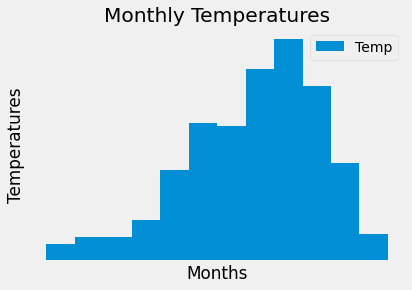

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_highest_count = stations_max_count[0]

data = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > query_date).filter(Measurement.station == station_highest_count).order_by(Measurement.date).all()

data_df = pd.DataFrame(data, columns= ["date","Temp"])
# data_df.head()


data_df.plot.hist(bins=12)
plt.title("Monthly Temperatures")
plt.ylabel("Temperatures")
plt.xlabel("Months")
plt.xticks([])
plt.yticks([])
plt.show




## Bonus Challenge Assignment

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [37]:
# Plot the daily normals as an area plot with `stacked=False`
